<a href="https://colab.research.google.com/github/keedjk7/Machine-Learning/blob/main/Activity5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics, model_selection
import pandas_datareader.data as web

In [ ]:
!pip install git+https://github.com/pydata/pandas-datareader.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pydata/pandas-datareader.git to /tmp/pip-req-build-l4gu1atz
  Running command git clone -q https://github.com/pydata/pandas-datareader.git /tmp/pip-req-build-l4gu1atz


## Get Data

In [ ]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [ ]:
Base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

## Stadardized Data

In [ ]:
X1_index = X1.index
X1_columns = X1.columns
X1_index, X1_columns

(DatetimeIndex(['2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09',
                '2017-11-10', '2017-11-13', '2017-11-14', '2017-11-15',
                '2017-11-16', '2017-11-17',
                ...
                '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
                '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
                '2022-11-03', '2022-11-04'],
               dtype='datetime64[ns]', name='Date', length=1259, freq=None),
 MultiIndex([('Adj Close', 'GOOGL'),
             ('Adj Close',   'IBM')],
            names=['Attributes', 'Symbols']))

In [ ]:
standard_scaler = StandardScaler()
X1_new = standard_scaler.fit_transform(X1.values)
X1_AfterScaler = pd.DataFrame(data = X1_new, index = X1_index, columns = X1_columns)
X1_AfterScaler

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-11-06 -1.036430 -0.191148
2017-11-07 -1.020867 -0.156211
2017-11-08 -1.011410 -0.141143
2017-11-09 -1.028352 -0.125224
2017-11-10 -1.034074 -0.204103
...              ...       ...
2022-10-31  0.321960  2.045054
2022-11-01  0.192455  2.036873
2022-11-02  0.080260  1.912347
2022-11-03 -0.033217  1.697834
2022-11-04  0.067758  1.924164

[1259 rows x 2 columns]

In [ ]:
X2_index = X2.index
X2_columns = X2.columns
X2_index, X2_columns

(DatetimeIndex(['2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09',
                '2017-11-10', '2017-11-13', '2017-11-14', '2017-11-15',
                '2017-11-16', '2017-11-17',
                ...
                '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
                '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
                '2022-10-27', '2022-10-28'],
               dtype='datetime64[ns]', name='DATE', length=1300, freq=None),
 Index(['DEXJPUS', 'DEXUSUK'], dtype='object'))

In [ ]:
X2_new = standard_scaler.fit_transform(X2.values)
X2_AfterScaler = pd.DataFrame(data = X2_new, index = X2_index, columns = X2_columns)
X2_AfterScaler

,DEXJPUS,DEXUSUK
DATE,,
2017-11-06,0.137234,0.124798
2017-11-07,0.137234,0.135523
2017-11-08,0.106978,0.068107
2017-11-09,0.083206,0.106412
2017-11-10,NaN,NaN
...,...,...
2022-10-24,3.904071,-2.709746
2022-10-25,3.805740,-2.443146
2022-10-26,3.659864,-2.219446


In [ ]:
X3_index = X3.index
X3_columns = X3.columns
X3_index, X3_columns

(DatetimeIndex(['2017-11-06', '2017-11-07', '2017-11-08', '2017-11-09',
                '2017-11-10', '2017-11-13', '2017-11-14', '2017-11-15',
                '2017-11-16', '2017-11-17',
                ...
                '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
                '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
                '2022-11-03', '2022-11-04'],
               dtype='datetime64[ns]', name='DATE', length=1305, freq='B'),
 Index(['SP500', 'DJIA', 'VIXCLS'], dtype='object'))

In [ ]:
X3_new = standard_scaler.fit_transform(X3.values)
X3_AfterScaler = pd.DataFrame(data = X3_new, index = X3_index, columns = X3_columns)
X3_AfterScaler

,SP500,DJIA,VIXCLS
DATE,,,
2017-11-06,-1.209996,-1.291909,-1.339497
2017-11-07,-1.210720,-1.289728,-1.282813
2017-11-08,-1.205197,-1.288211,-1.295538
2017-11-09,-1.219609,-1.313316,-1.212246
2017-11-10,-1.223035,-1.323151,-1.120857
...,...,...,...
2022-10-31,0.681349,0.981640,0.566952
2022-11-01,0.657900,0.961899,0.558854
2022-11-02,0.515538,0.836782,0.564638


In [ ]:
# Calculate ความแตกต่างของค่า ราคา 'Adj Close', 'MSFT’)ย้อนหลัง return_period วัน

return_period = 7
base = stk_data.loc[:,('Adj Close','MSFT')]

Y = base.shift(-return_period)
X4_3DT = base.diff(3*return_period).shift(-3*return_period)
X4_6DT = base.diff(6*return_period).shift(-6*return_period)
X4_12DT = base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(standard_scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

# Forming Dataset
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-11-06,78.363708,52.133999,113.688080,113.90,1.3145,2591.13,23548.42,9.40,-0.269842,-0.080700,-0.002526
2017-11-07,78.571495,52.619499,114.072441,113.90,1.3152,2590.64,23557.23,9.89,-0.275942,-0.073625,0.014099
2017-11-08,77.815994,52.914501,114.238220,113.62,1.3108,2594.38,23563.36,9.78,-0.183318,-0.108664,-0.088712
2017-11-09,77.938751,52.386002,114.413353,113.40,1.3133,2584.62,23461.94,10.50,-0.080219,-0.071637,-0.092383
2017-11-10,79.062561,52.207500,113.545555,NaN,NaN,2582.30,23422.21,11.29,-0.042075,0.016848,-0.071106
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,NaN,94.510002,138.289993,NaN,NaN,3871.98,32732.95,25.88,NaN,NaN,NaN
2022-11-01,NaN,90.470001,138.199997,NaN,NaN,3856.10,32653.20,25.81,NaN,NaN,NaN
2022-11-02,NaN,86.970001,136.830002,NaN,NaN,3759.69,32147.76,25.86,NaN,NaN,NaN
2022-11-03,NaN,83.430000,134.470001,NaN,NaN,3719.89,32001.25,25.30,NaN,NaN,NaN


## Data Preparation

In [ ]:
count_nan = dataset.isnull().sum()
count_nan, dataset.shape

((Adj Close, MSFT)      53
 (Adj Close, GOOGL)     46
 (Adj Close, IBM)       46
 DEXJPUS                63
 DEXUSUK                63
 SP500                  46
 DJIA                   46
 VIXCLS                 43
 MSFT_3DT               67
 MSFT_6DT               88
 MSFT_12DT             130
 dtype: int64, (1305, 11))

In [ ]:
dataset = dataset[dataset.isnull().sum(axis=1)<2]
count_nan = dataset.isnull().sum()
count_nan, dataset.shape

((Adj Close, MSFT)      0
 (Adj Close, GOOGL)     0
 (Adj Close, IBM)       0
 DEXJPUS                0
 DEXUSUK                0
 SP500                  0
 DJIA                   0
 VIXCLS                 0
 MSFT_3DT               0
 MSFT_6DT               0
 MSFT_12DT             42
 dtype: int64, (1201, 11))

In [ ]:
dataset['MSFT_12DT'].fillna(0, inplace=True)
count_nan = dataset.isnull().sum()
count_nan

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(Adj Close, MSFT)     0
(Adj Close, GOOGL)    0
(Adj Close, IBM)      0
DEXJPUS               0
DEXUSUK               0
SP500                 0
DJIA                  0
VIXCLS                0
MSFT_3DT              0
MSFT_6DT              0
MSFT_12DT             0
dtype: int64

In [ ]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,184.924247,83.989760,115.478448,111.647685,1.311559,3398.349734,28702.155820,20.710458,0.017185,-0.000220,-0.000221
std,77.821163,31.588800,10.927224,7.424755,0.058424,684.620084,4087.198916,8.690424,0.988079,1.001420,0.982095
min,76.569420,49.562500,79.847000,102.520000,1.147300,2237.400000,18591.930000,9.150000,-3.501807,-3.827655,-3.102055
25%,107.664238,57.550999,108.729271,107.640000,1.272400,2806.980000,25400.640000,14.880000,-0.395352,-0.375155,-0.318222
50%,175.602982,70.251999,114.109093,109.720000,1.310400,3133.640000,27186.690000,18.840000,0.074107,0.081855,0.008134
75%,255.263885,113.809998,124.196434,112.580000,1.356900,4077.910000,32832.540000,24.520000,0.479471,0.499286,0.534487
max,340.882782,149.838501,141.102219,144.390000,1.433200,4796.560000,36799.650000,82.690000,3.337065,2.549182,2.552632


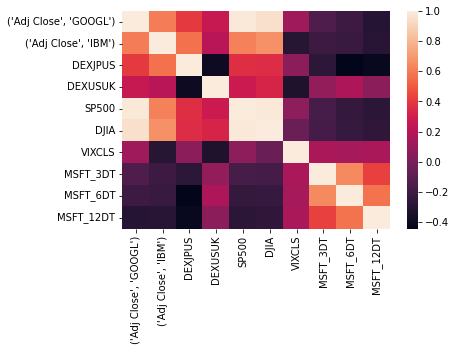

In [ ]:
# Assign X, Y (drop datetime index)
X = dataset.drop(labels = [('Adj Close', 'MSFT')],axis = 1)
Y = dataset[('Adj Close', 'MSFT')]
dataCorr = X.corr()
sns.heatmap(dataCorr)

In [ ]:
lower = pd.DataFrame(np.tril(dataCorr,-1),columns = dataCorr.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
1,0.607685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
2,0.403392,0.571153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
3,0.263742,0.212265,-0.398344,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
4,0.985222,0.617044,0.364748,0.277722,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
5,0.959976,0.672307,0.358955,0.327330,0.985983,0.000000,0.000000,0.000000,0.00000,0.0
6,0.123704,-0.295330,0.066595,-0.327800,0.072850,-0.051667,0.000000,0.000000,0.00000,0.0
7,-0.150131,-0.211156,-0.269347,0.089879,-0.175472,-0.179279,0.161918,0.000000,0.00000,0.0
8,-0.218218,-0.228829,-0.444206,0.176096,-0.241206,-0.240423,0.150863,0.648396,0.00000,0.0
9,-0.299742,-0.288949,-0.414666,0.067992,-0.276489,-0.263127,0.161937,0.420428,0.57436,0.0


In [ ]:
to_drop = [column for column in lower if any(lower[column] > 0.9) or any(lower[column] < -0.9) ]
X.drop(to_drop, inplace=True, axis=1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-11-06,113.688080,113.90,1.3145,23548.42,9.40,-0.269842,-0.080700,-0.002526
2017-11-07,114.072441,113.90,1.3152,23557.23,9.89,-0.275942,-0.073625,0.014099
2017-11-08,114.238220,113.62,1.3108,23563.36,9.78,-0.183318,-0.108664,-0.088712
2017-11-09,114.413353,113.40,1.3133,23461.94,10.50,-0.080219,-0.071637,-0.092383
2017-11-13,112.967010,113.62,1.3101,23439.70,11.50,-0.061499,-0.049797,-0.057100
...,...,...,...,...,...,...,...,...
2022-08-31,128.449997,138.69,1.1647,31510.43,25.87,-2.213282,-1.876988,0.000000
2022-09-01,129.660004,139.93,1.1541,31656.42,25.56,-1.580676,-2.032710,0.000000
2022-09-02,127.790001,140.03,1.1582,31318.44,25.47,-0.694604,-2.233695,0.000000
2022-09-06,126.720001,142.95,1.1549,31145.30,26.91,-0.472377,-2.397500,0.000000


In [ ]:
# Train / Test Preparation
# test_size = 0.3 * len( X )
# train_size = 0.7 * len( X )
# X_train, X_test = X[0:train_size], X[train_size:len(X)]
# Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]
Rseed = 777
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = Rseed)

## Model Training and Cross Validation

In [ ]:
#Set number of fold / Seed value
Num_fold = 3
Seed = 777
# Cross Validation Model
# set k-fold crossvalidation with shuffle
kfold = model_selection.KFold(n_splits= Num_fold, shuffle = True, random_state = Seed)

In [ ]:
# Model selection
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
# c_val ลองอย่างน้อย 3 ค่า [0.1, 1, 10, 100]

c_val1 = 0.1
svr_lin1 = SVR(kernel='linear', C=c_val1)
svr_rbf1 = SVR(kernel='rbf', C=c_val1, gamma=0.01)
svr_poly1 = SVR(kernel='poly', C=c_val1, degree=2)

# Calculate accuracy score for each model
score_LM1 = model_selection.cross_val_score(Model_LM, x_train, y_train, cv=kfold)
score_lin1 = model_selection.cross_val_score(svr_lin1, x_train, y_train, cv=kfold)
score_rbf1 = model_selection.cross_val_score(svr_rbf1, x_train, y_train, cv=kfold)
score_poly1 = model_selection.cross_val_score(svr_poly1, x_train, y_train, cv=kfold)

# View score k-fold
# Valication score comparison
score1 = pd.DataFrame({'Linear Model':score_LM1,'SVR_linear':score_lin1, 'SVR_rbf': score_rbf1, 'SVR_poly':
score_poly1})
score_mean1 = pd.DataFrame({'AVG Linear Model':[score_LM1.mean()],'AVG SVR_linear':[score_lin1.mean()],
'AVG SVR_rbf': [score_rbf1.mean()], 'AVG SVC_poly': [score_poly1.mean()]})


c_val2 = 1
svr_lin2 = SVR(kernel='linear', C=c_val2)
svr_rbf2 = SVR(kernel='rbf', C=c_val2, gamma=0.01)
svr_poly2 = SVR(kernel='poly', C=c_val2, degree=2)

# Calculate accuracy score for each model
score_LM2 = model_selection.cross_val_score(Model_LM, x_train, y_train, cv=kfold)
score_lin2 = model_selection.cross_val_score(svr_lin2, x_train, y_train, cv=kfold)
score_rbf2 = model_selection.cross_val_score(svr_rbf2, x_train, y_train, cv=kfold)
score_poly2 = model_selection.cross_val_score(svr_poly2, x_train, y_train, cv=kfold)

# View score k-fold
# Valication score comparison
score2 = pd.DataFrame({'Linear Model':score_LM2,'SVR_linear':score_lin2, 'SVR_rbf': score_rbf2, 'SVR_poly':
score_poly2})
score_mean2 = pd.DataFrame({'AVG Linear Model':[score_LM2.mean()],'AVG SVR_linear':[score_lin2.mean()],
'AVG SVR_rbf': [score_rbf2.mean()], 'AVG SVC_poly': [score_poly2.mean()]})


c_val3 = 10
svr_lin3 = SVR(kernel='linear', C=c_val3)
svr_rbf3 = SVR(kernel='rbf', C=c_val3, gamma=0.01)
svr_poly3 = SVR(kernel='poly', C=c_val3, degree=2)

# Calculate accuracy score for each model
score_LM3 = model_selection.cross_val_score(Model_LM, x_train, y_train, cv=kfold)
score_lin3 = model_selection.cross_val_score(svr_lin3, x_train, y_train, cv=kfold)
score_rbf3 = model_selection.cross_val_score(svr_rbf3, x_train, y_train, cv=kfold)
score_poly3 = model_selection.cross_val_score(svr_poly3, x_train, y_train, cv=kfold)

# View score k-fold
# Valication score comparison
score3 = pd.DataFrame({'Linear Model':score_LM3,'SVR_linear':score_lin3, 'SVR_rbf': score_rbf3, 'SVR_poly':
score_poly3})
score_mean3 = pd.DataFrame({'AVG Linear Model':[score_LM3.mean()],'AVG SVR_linear':[score_lin3.mean()],
'AVG SVR_rbf': [score_rbf3.mean()], 'AVG SVC_poly': [score_poly3.mean()]})

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was

In [ ]:
score1

In [ ]:
# print(score1)
# print(score_mean1)
# print(score2)
# print(score_mean2)
# print(score3)
# print(score_mean3)

Linear_Model = np.array(score1['Linear Model'])
Linear_Model = np.append(Linear_Model, score2['Linear Model'])
Linear_Model = np.append(Linear_Model, score3['Linear Model'])

SVR_linear = np.array(score1['SVR_linear'])
SVR_linear = np.append(SVR_linear, score2['SVR_linear'])
SVR_linear = np.append(SVR_linear, score3['SVR_linear'])

SVR_rbf = np.array(score1['SVR_rbf'])
SVR_rbf = np.append(SVR_rbf, score2['SVR_rbf'])
SVR_rbf = np.append(SVR_rbf, score3['SVR_rbf'])

SVR_poly = np.array(score1['SVR_poly'])
SVR_poly = np.append(SVR_poly, score2['SVR_poly'])
SVR_poly = np.append(SVR_poly, score3['SVR_poly'])
Linear_Model, SVR_linear, SVR_rbf, SVR_poly

In [ ]:
graphX = [["0.1_L1","0.1_SVR_L1","0.1_SVR_rbf1","0.1_SVR_poly1","0.1_L2","0.1_SVR_L2","0.1_SVR_rbf2","0.1_SVR_poly2","0.1_L3","0.1_SVR_L3","0.1_SVR_rbf3","0.1_SVR_poly3"],
          ["1_L1","1_SVR_L1","1_SVR_rbf1","1_SVR_poly1","1_L2","1_SVR_L2","1_SVR_rbf2","1_SVR_poly2","1_L3","1_SVR_L3","1_SVR_rbf3","1_SVR_poly3"],
          ["10_L1","10_SVR_L1","10_SVR_rbf1","10_SVR_poly1","10_L2","10_SVR_L2","10_SVR_rbf2","10_SVR_poly2","10_L3","10_SVR_L3","10_SVR_rbf3","10_SVR_poly3"]]
graphY = [[],[],[]]
for i in range(3):
  for j in range(3):
    graphY[i].append(Linear_Model[i+j])
    graphY[i].append(SVR_linear[i+j])
    graphY[i].append(SVR_rbf[i+j])
    graphY[i].append(SVR_poly[i+j])


In [ ]:
# plt.bar(["0.1_1","0.1_2","0.1_3","1_1","1_2","1_3","10_1","10_2","10_3"],Linear_Model)
ax = plt.subplot()
plt.bar(graphX[0],graphY[0])
plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
plt.show()

In [ ]:
ax = plt.subplot()
plt.bar(graphX[1],graphY[1])
plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
plt.show()

In [ ]:
ax = plt.subplot()
plt.bar(graphX[2],graphY[2])
plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
plt.show()

## Model Evaluation

In [ ]:
# Predict all models ( LM, SVR_linear, SVR_rbf, SVR Poly )
LM_pred = Model_LM.fit(x_train, y_train).predict(x_test)
SVR_Linear1_pred = svr_lin1.fit (x_train, y_train).predict(x_test)
SVR_Linear2_pred = svr_lin2.fit (x_train, y_train).predict(x_test)
SVR_Linear3_pred = svr_lin3.fit (x_train, y_train).predict(x_test)
SVR_RBF1_pred = svr_rbf1.fit(x_train, y_train).predict(x_test)
SVR_RBF2_pred = svr_rbf2.fit(x_train, y_train).predict(x_test)
SVR_RBF3_pred = svr_rbf3.fit(x_train, y_train).predict(x_test)
SVR_Poly1_pred = svr_poly1.fit(x_train, y_train).predict(x_test)
SVR_Poly2_pred = svr_poly2.fit(x_train, y_train).predict(x_test)
SVR_Poly3_pred = svr_poly3.fit(x_train, y_train).predict(x_test)

In [ ]:
# Scatter Plot ( X_test, Predict ) for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
plt.scatter(x_test.index, LM_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Linear1_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Linear2_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Linear3_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_RBF1_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_RBF2_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_RBF3_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Poly1_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Poly2_pred, c = 'black')

In [ ]:
plt.scatter(x_test.index, SVR_Poly3_pred, c = 'black')

In [ ]:
# Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )

R2 = []
MSE = []

#LM_pred
# MSE
LM_MSE = metrics.mean_squared_error(y_test, LM_pred)
MSE.append(LM_MSE)
# R2
LM_r2 = metrics.r2_score(y_test, LM_pred)
R2.append(LM_r2)


#SVR_linear1
# MSE
SVR_L1_MSE = metrics.mean_squared_error(y_test, SVR_Linear1_pred)
MSE.append(SVR_L1_MSE)
# R2
SVR_L1_r2 = metrics.r2_score(y_test, SVR_Linear1_pred)
R2.append(SVR_L1_r2)

#SVR_linear2
# MSE
SVR_L2_MSE = metrics.mean_squared_error(y_test, SVR_Linear2_pred)
MSE.append(SVR_L2_MSE)
# R2
SVR_L2_r2 = metrics.r2_score(y_test, SVR_Linear2_pred)
R2.append(SVR_L2_r2)

#SVR_linear3
# MSE
SVR_L3_MSE = metrics.mean_squared_error(y_test, SVR_Linear3_pred)
MSE.append(SVR_L3_MSE)
# R2
SVR_L3_r2 = metrics.r2_score(y_test, SVR_Linear3_pred)
R2.append(SVR_L3_r2)


#SVR_rbf1
# MSE
SVR_rbf1_MSE = metrics.mean_squared_error(y_test, SVR_RBF1_pred)
MSE.append(SVR_rbf1_MSE)
# R2
SVR_rbf1_r2 = metrics.r2_score(y_test, SVR_RBF1_pred)
R2.append(SVR_rbf1_r2)

#SVR_rbf2
# MSE
SVR_rbf2_MSE = metrics.mean_squared_error(y_test, SVR_RBF2_pred)
MSE.append(SVR_rbf2_MSE)
# R2
SVR_rbf2_r2 = metrics.r2_score(y_test, SVR_RBF2_pred)
R2.append(SVR_rbf2_r2)

#SVR_rbf3
# MSE
SVR_rbf3_MSE = metrics.mean_squared_error(y_test, SVR_RBF3_pred)
MSE.append(SVR_rbf3_MSE)
# R2
SVR_rbf3_r2 = metrics.r2_score(y_test, SVR_RBF3_pred)
R2.append(SVR_rbf3_r2)


#SVR_poly1
# MSE
SVR_Poly1_MSE = metrics.mean_squared_error(y_test, SVR_Poly1_pred)
MSE.append(SVR_Poly1_MSE)
# R2
SVR_Poly1_r2 = metrics.r2_score(y_test, SVR_Poly1_pred)
R2.append(SVR_Poly1_r2)

#SVR_poly2
# MSE
SVR_Poly2_MSE = metrics.mean_squared_error(y_test, SVR_Poly2_pred)
MSE.append(SVR_Poly2_MSE)
# R2
SVR_Poly2_r2 = metrics.r2_score(y_test, SVR_Poly2_pred)
R2.append(SVR_Poly2_r2)

#SVR_poly3
# MSE
SVR_Poly3_MSE = metrics.mean_squared_error(y_test, SVR_Poly3_pred)
MSE.append(SVR_Poly3_MSE)
# R2
SVR_Poly3_r2 = metrics.r2_score(y_test, SVR_Poly3_pred)
R2.append(SVR_Poly3_r2)

In [ ]:
X_pred = ['LM','SVR_L1','SVR_L2','SVR_L3','SVR_rbf1','SVR_rbf2','SVR_rbf3','SVR_Poly1','SVR_Poly2','SVR_Poly3']
ax = plt.subplot()
plt.bar(X_pred,R2)
plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
plt.show()

In [ ]:
ax = plt.subplot()
plt.bar(X_pred,MSE)
plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
plt.show()

In [ ]:
pd.DataFrame({'Model':X_pred,'R2':R2,'MSE':MSE})